# Data Preparation

In [1]:
# Import the packages in need

import math
import statistics
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import plotly.express as px 

from IPython.display import Math, Latex
from IPython.core.display import Image
from scipy.stats import uniform, norm, gamma, expon, poisson, binom, bernoulli, skew, mode

# seaborn configuration
sns.set(color_codes=True)
sns.set(rc={"figure.figsize": (5,5)})

In [2]:
# import dataset

nyc = pd.read_csv("dataset/nyc-rolling-sales.csv")
print("Dataset shape :", nyc.shape)
display(nyc.head())
display(nyc.tail())

Dataset shape : (84548, 22)


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


In [3]:
# Drop two columns [Ease-ment, Unnamed: 0]

nyc.drop(["EASE-MENT","Unnamed: 0"], axis=1, inplace=True)

In [4]:
# Missing Value Detected

nyc.info()
nyc.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

BOROUGH                           0
NEIGHBORHOOD                      0
BUILDING CLASS CATEGORY           0
TAX CLASS AT PRESENT              0
BLOCK                             0
LOT                               0
BUILDING CLASS AT PRESENT         0
ADDRESS                           0
APARTMENT NUMBER                  0
ZIP CODE                          0
RESIDENTIAL UNITS                 0
COMMERCIAL UNITS                  0
TOTAL UNITS                       0
LAND SQUARE FEET                  0
GROSS SQUARE FEET                 0
YEAR BUILT                        0
TAX CLASS AT TIME OF SALE         0
BUILDING CLASS AT TIME OF SALE    0
SALE PRICE                        0
SALE DATE                         0
dtype: int64

In [5]:
#First, let's check which columns should be categorical

for col in nyc.columns:
    if nyc[col].dtype=='object':
        print(col, nyc[col].nunique())

NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [6]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    nyc[col] = pd.to_numeric(nyc[col], errors='coerce')

categ = [
        'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 
        'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE'
        ]
for col in categ:
    nyc[col] = nyc[col].astype('category')

nyc['SALE DATE'] = pd.to_datetime(nyc['SALE DATE'], errors='coerce')

In [7]:
# Our dataset is ready for checking missing values.

missing = nyc.isnull().sum()/len(nyc)*100

print(pd.DataFrame([missing[missing>0],pd.Series(nyc.isnull().sum()[nyc.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


In [8]:
# We can fill in the missing value from one column to another, which will help us reduce missing values.

print(nyc[(nyc['LAND SQUARE FEET'].isnull()) & (nyc['GROSS SQUARE FEET'].notnull())].shape)
print(nyc[(nyc['LAND SQUARE FEET'].notnull()) & (nyc['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


In [9]:
# There are 1372 rows that can be filled in with their approximate values.

nyc['LAND SQUARE FEET'] = nyc['LAND SQUARE FEET'].mask((nyc['LAND SQUARE FEET'].isnull()) & (nyc['GROSS SQUARE FEET'].notnull()), nyc['GROSS SQUARE FEET'])
nyc['GROSS SQUARE FEET'] = nyc['GROSS SQUARE FEET'].mask((nyc['LAND SQUARE FEET'].notnull()) & (nyc['GROSS SQUARE FEET'].isnull()), nyc['LAND SQUARE FEET'])

In [10]:
# finally check if there is any duplicated value:
sum(nyc.duplicated())

765

In [11]:
# drop the duplicate value

nyc.drop_duplicates(inplace=True)

print(sum(nyc.duplicated()))

0


In [12]:
# Missing Value Detected

nyc.info()
nyc.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83783 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         83783 non-null  int64         
 1   NEIGHBORHOOD                    83783 non-null  category      
 2   BUILDING CLASS CATEGORY         83783 non-null  category      
 3   TAX CLASS AT PRESENT            83783 non-null  category      
 4   BLOCK                           83783 non-null  int64         
 5   LOT                             83783 non-null  int64         
 6   BUILDING CLASS AT PRESENT       83783 non-null  category      
 7   ADDRESS                         83783 non-null  object        
 8   APARTMENT NUMBER                83783 non-null  object        
 9   ZIP CODE                        83783 non-null  int64         
 10  RESIDENTIAL UNITS               83783 non-null  int64         
 11  CO

BOROUGH                               0
NEIGHBORHOOD                          0
BUILDING CLASS CATEGORY               0
TAX CLASS AT PRESENT                  0
BLOCK                                 0
LOT                                   0
BUILDING CLASS AT PRESENT             0
ADDRESS                               0
APARTMENT NUMBER                      0
ZIP CODE                              0
RESIDENTIAL UNITS                     0
COMMERCIAL UNITS                      0
TOTAL UNITS                           0
LAND SQUARE FEET                  26049
GROSS SQUARE FEET                 26049
YEAR BUILT                            0
TAX CLASS AT TIME OF SALE             0
BUILDING CLASS AT TIME OF SALE        0
SALE PRICE                        14176
SALE DATE                             0
dtype: int64

In [13]:
# Capture the necessary data
variables = nyc.columns

count = []

for variable in variables:
    length = nyc[variable].count()
    count.append(length)
    
count_pct = np.round(100 * pd.Series(count) / len(nyc), 2)

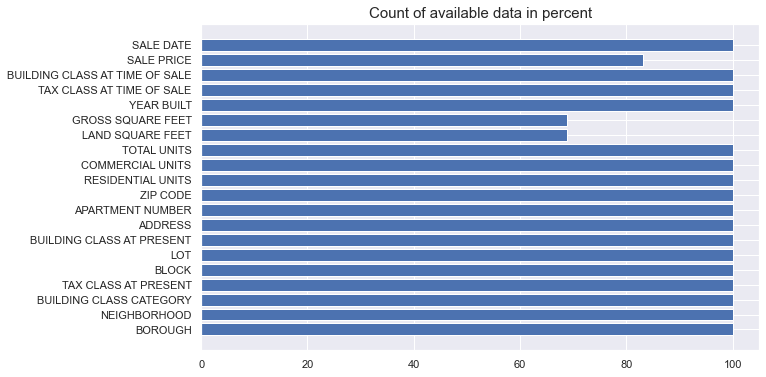

In [14]:
#Plot number of available data per variable
plt.figure(figsize=(10,6))
plt.barh(variables, count_pct)
plt.title('Count of available data in percent', fontsize=15)
plt.show()

# Exploration Data Analysis

In [15]:
## Describe the numeric columns
nyc.describe(include="all").T

<ipython-input-15-74b657b1ca91>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  nyc.describe(include="all").T


,count,unique,top,freq,first,last,mean,std,min,25%,50%,75%,max
BOROUGH,83783,NaN,NaN,NaN,NaT,NaT,2.99931,1.28867,1,2,3,4,5
NEIGHBORHOOD,83783,254,FLUSHING-NORTH,3058,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BUILDING CLASS CATEGORY,83783,47,01 ONE FAMILY DWELLINGS,18107,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAX CLASS AT PRESENT,83783,11,1,38329,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
BLOCK,83783,NaN,NaN,NaN,NaT,NaT,4242.9,3568.79,1,1326,3319,6295,16322
LOT,83783,NaN,NaN,NaN,NaT,NaT,376.137,658.021,1,22,50,1001,9106
BUILDING CLASS AT PRESENT,83783,167,D4,12637,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ADDRESS,83783,67563,131-05 40TH ROAD,210,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
APARTMENT NUMBER,83783,3989,,64934,NaT,NaT,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ZIP CODE,83783,NaN,NaN,NaN,NaT,NaT,10733.2,1289.76,0,10305,11209,11357,11694


In [16]:
## Describe the character columns
nyc.describe(include = 'O').T

,count,unique,top,freq
ADDRESS,83783,67563,131-05 40TH ROAD,210
APARTMENT NUMBER,83783,3989,,64934


In [17]:
nyc['BOROUGH'][nyc['BOROUGH'] == 1] = 'Manhatten'
nyc['BOROUGH'][nyc['BOROUGH'] == 2] = 'Bronx'
nyc['BOROUGH'][nyc['BOROUGH'] == 3] = 'Brooklyn'
nyc['BOROUGH'][nyc['BOROUGH'] == 4] = 'Queens'
nyc['BOROUGH'][nyc['BOROUGH'] == 5] = 'Staten Island'

<ipython-input-17-1b8faa8cb057>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nyc['BOROUGH'][nyc['BOROUGH'] == 1] = 'Manhatten'


In [18]:
nyc['BOROUGH'].value_counts()

Queens           26548
Brooklyn         23843
Manhatten        18102
Staten Island     8296
Bronx             6994
Name: BOROUGH, dtype: int64

In [19]:
nyc.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,Manhatten,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,Manhatten,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,Manhatten,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,Manhatten,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,Manhatten,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [20]:
# Mean value of tranactions per building category

mean_borough_sales = nyc.groupby('BOROUGH').mean()[['SALE PRICE']]
mean_borough_sales

,SALE PRICE
BOROUGH,
Bronx,5.946771e+05
Brooklyn,8.410834e+05
Manhatten,3.344642e+06
Queens,7.388827e+05
Staten Island,5.436113e+05


In [21]:
# median value of tranactions per building category

median_bulding_sales = nyc.groupby('BUILDING CLASS CATEGORY').median()[['SALE PRICE']]
median_bulding_sales

,SALE PRICE
BUILDING CLASS CATEGORY,
01 ONE FAMILY DWELLINGS,475000.0
02 TWO FAMILY DWELLINGS,540000.0
03 THREE FAMILY DWELLINGS,507000.0
04 TAX CLASS 1 CONDOS,373000.0
05 TAX CLASS 1 VACANT LAND,112007.0
06 TAX CLASS 1 - OTHER,0.0
07 RENTALS - WALKUP APARTMENTS,770000.0
08 RENTALS - ELEVATOR APARTMENTS,9050000.0
09 COOPS - WALKUP APARTMENTS,283000.0


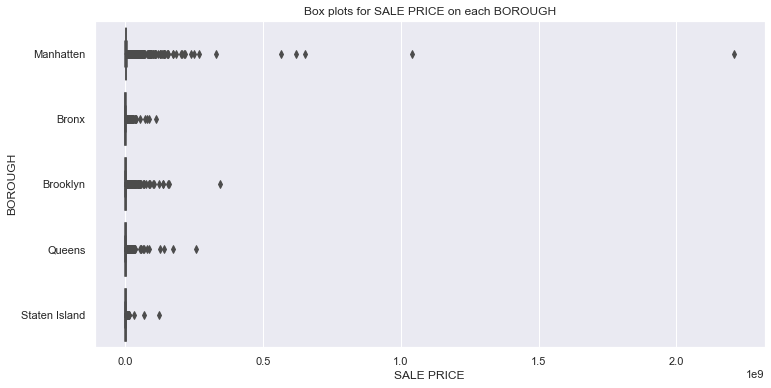

In [22]:
#Plot the Box plots for SALE PRICE on each BOROUGH

plt.figure(figsize=(12,6))
sns.boxplot(y = 'BOROUGH', x = 'SALE PRICE', data = nyc )
plt.title('Box plots for SALE PRICE on each BOROUGH')
plt.show()

#### The High Counts in dataset is Queens Borough

In [23]:
#Create the table list of Queens Borough

Queens = nyc.loc[nyc['BOROUGH']=='Queens', :]
Queens.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
49402,Queens,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,15,A5,21-20 81ST STREET,,11370,1,0,1,1800.0,1224.0,1950,1,A5,792000.0,2017-07-26
49403,Queens,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,54,A5,21-35 80TH STREET,,11370,1,0,1,1800.0,1224.0,1950,1,A5,10.0,2017-06-13
49404,Queens,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,63,A5,21-17 80TH STREET,,11370,1,0,1,1800.0,1224.0,1950,1,A5,275500.0,2016-11-18
49405,Queens,AIRPORT LA GUARDIA,03 THREE FAMILY DWELLINGS,1,949,17,C0,1914 81 STREET,,11370,3,0,3,2826.0,1840.0,1940,1,C0,970000.0,2017-07-31
49406,Queens,AIRPORT LA GUARDIA,07 RENTALS - WALKUP APARTMENTS,2A,949,67,C2,1949A 80TH STREET,,11370,6,0,6,2400.0,3960.0,1971,2,C2,1400000.0,2017-05-16


In [24]:
# Find standard deviation of sales price in Queens

Queens.agg(stddev_sale_price = pd.NamedAgg('SALE PRICE', np.std))

,SALE PRICE
stddev_sale_price,3.227420e+06


In [25]:
# Find varians of sales price in Queens

Queens.agg(variance_sale_price = pd.NamedAgg('SALE PRICE', np.var))

,SALE PRICE
variance_sale_price,1.041624e+13


## Range

In [26]:
# Find maximum of sales price in Queens

df = (Queens['SALE PRICE'])
df.max()

257500000.0

In [27]:
# Find minimum of sales price in Queens

df = (Queens['SALE PRICE'])
df.min()

1.0

In [28]:
# Find range of sales price in Queens

print(df.max() - df.min())

257499999.0


In [29]:
# Convert data frame to list

df.values.tolist()
df.head()

49402     792000.0
49403         10.0
49404     275500.0
49405     970000.0
49406    1400000.0
Name: SALE PRICE, dtype: float64

In [30]:
# drop na this column

a = df.dropna()
a.head()

49402     792000.0
49403         10.0
49404     275500.0
49405     970000.0
49406    1400000.0
Name: SALE PRICE, dtype: float64

In [31]:
# Find quartiles of sales price in Queens

np_quartiles = np.quantile(a, [.25, .5, .75])
print(np_quartiles)

# Find inter-quartiles of sales price in Queens
np_iqr = np_quartiles[-1] - np_quartiles[0]
print("IQR:", np_iqr)

[285000. 495000. 775000.]
IQR: 490000.0


In [32]:
# Find mode of sales price in Queens

series_w = pd.Series(a)
print(series_w.mode())

0    10.0
dtype: float64


In [33]:
# Create the new variables 'BUILDING AGE' from 'YEAR BUILT' to in now time (2021)

Queens['BUILDING AGE'] = 2021 - Queens['YEAR BUILT']
Queens.head()

<ipython-input-33-7b0c28feb424>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Queens['BUILDING AGE'] = 2021 - Queens['YEAR BUILT']


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,...,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE,BUILDING AGE
49402,Queens,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,15,A5,21-20 81ST STREET,,11370,...,0,1,1800.0,1224.0,1950,1,A5,792000.0,2017-07-26,71
49403,Queens,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,54,A5,21-35 80TH STREET,,11370,...,0,1,1800.0,1224.0,1950,1,A5,10.0,2017-06-13,71
49404,Queens,AIRPORT LA GUARDIA,01 ONE FAMILY DWELLINGS,1,976,63,A5,21-17 80TH STREET,,11370,...,0,1,1800.0,1224.0,1950,1,A5,275500.0,2016-11-18,71
49405,Queens,AIRPORT LA GUARDIA,03 THREE FAMILY DWELLINGS,1,949,17,C0,1914 81 STREET,,11370,...,0,3,2826.0,1840.0,1940,1,C0,970000.0,2017-07-31,81
49406,Queens,AIRPORT LA GUARDIA,07 RENTALS - WALKUP APARTMENTS,2A,949,67,C2,1949A 80TH STREET,,11370,...,0,6,2400.0,3960.0,1971,2,C2,1400000.0,2017-05-16,50


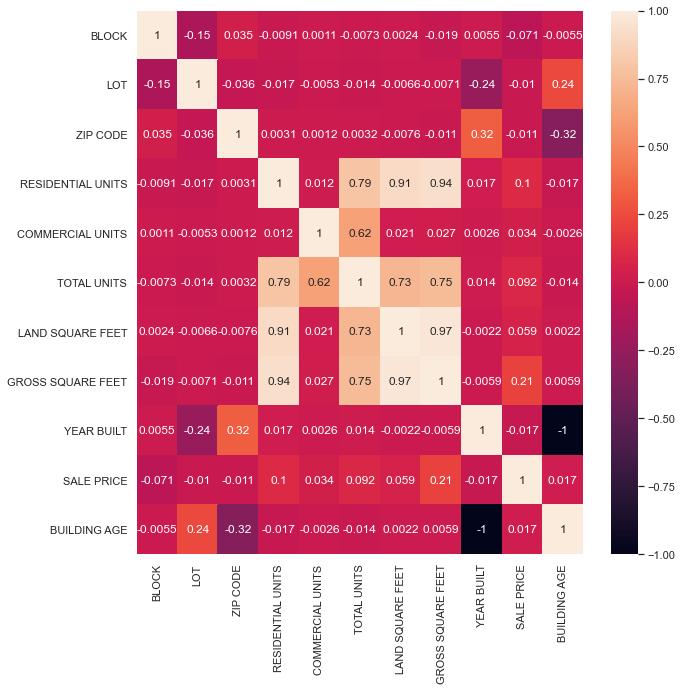

In [34]:
# Find the corelation all variables in Queens

df_cat=Queens.select_dtypes(include='object')
df_num=Queens.select_dtypes(exclude='object')
plt.figure(figsize=[10,10])
sns.heatmap(df_num.corr(),annot=True)
plt.show()

-4.772361825613667


C:\Users\Lenovo\anaconda3\envs\hacktiv8-env\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SALE PRICE', ylabel='Density'>

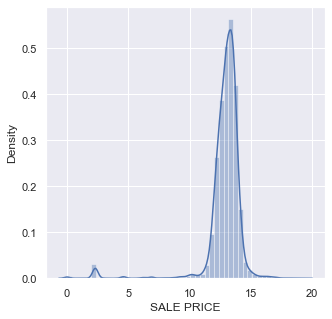

In [35]:
# Find the skewness Sale Price in Queens

sales=np.log(Queens['SALE PRICE'])
print(sales.skew())

# Find the distributions Sale Price in Queens
sns.distplot(sales)

### Convidence Interval

In [36]:
# Find the mean & standard deviation to all borough

nyc.groupby("BOROUGH").aggregate({"TOTAL UNITS": [np.mean, np.std, np.size]})

TOTAL UNITS                  
                     mean        std   size
BOROUGH                                    
Bronx            3.510152  22.681594   6994
Brooklyn         2.194229   8.707408  23843
Manhatten        2.597227  23.283374  18102
Queens           1.908920  23.147488  26548
Staten Island    1.313163   3.027469   8296

In [37]:
# Find the Standard error mean of block in borough Queens

mean_borough_Queens = 1.908920
std_borough_Queens = 23.147488
n_borough_Queens = 26548
z = 1.96

stderr_borough_Queens = std_borough_Queens / np.sqrt(n_borough_Queens)
print("Standard error mean of block in borough Queens :", stderr_borough_Queens)

Standard error mean of block in borough Queens : 0.14206528376495897


In [38]:
# Create Method for calculate CI

def compute_CI(estimate, stderr, z_score=1.96):
    return (
        estimate - z_score*stderr, # lower limit of the CI
        estimate + z_score*stderr  # Upper limit of the CI
    )

In [39]:
# Find the Confidence Interval in Queens 

lower_ci, upper_ci = compute_CI(mean_borough_Queens, stderr_borough_Queens)
print(f"CI for  block that located in borough Queens: [{lower_ci:.3f}, {upper_ci:.3f}]")

CI for  block that located in borough Queens: [1.630, 2.187]


### Hypothesis Test

#### Is there a difference between the average unit sold and the age of the building in Queens
#### Population : Data total unit Null Hypothesis : μ1=μ2 Alternative Hypothesis : μ1≠μ2

In [40]:
#Provide the data exclude Building Age=0 and Total Unit = 0
builing_age_less_50 = Queens[(Queens['BUILDING AGE']<=50) & (Queens['TOTAL UNITS']!=0) ].copy()
builing_age_over_50 = Queens[(Queens['BUILDING AGE']>50) & (Queens['TOTAL UNITS']!=0) ].copy()

In [41]:
#Calculate num of obs, mean, and std data 1
#num of obs
num_less_50 = len(builing_age_less_50)
num_over_50 = len(builing_age_over_50)

#mean
mu_less_50 = builing_age_less_50['TOTAL UNITS'].mean()
mu_over_50 = builing_age_over_50['TOTAL UNITS'].mean()

#std
std_less_50= builing_age_less_50['TOTAL UNITS'].std()
std_over_50= builing_age_over_50['TOTAL UNITS'].std()

In [42]:
# Caluculate the Z Test

sm.stats.ztest(builing_age_less_50['TOTAL UNITS'].dropna(),builing_age_over_50['TOTAL UNITS'].dropna(), alternative = "two-sided")

(1.5030637116997474, 0.13282261538064902)

### Insight

#### Because p-value is very low, we can say that not difference between the average unit sold and the age of the building in Queens